In [1]:
import tensorflow as tf

In [2]:
tf.__version__

'2.0.0'

In [3]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

In [4]:
print(x_train[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

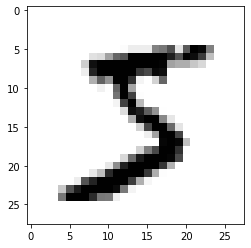

In [5]:
import matplotlib.pyplot as plt

plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [6]:
print(y_train[0])


5


In [7]:
x_train = x_train/255
x_test = x_test/255

In [8]:
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

In [9]:
x_train[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

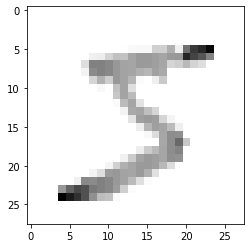

In [10]:
plt.imshow(x_train[0],cmap=plt.cm.binary)
plt.show()

In [11]:
model = tf.keras.models.Sequential()

In [12]:
model.add(tf.keras.layers.Flatten())   #Flatten the images! Could be done with numpy reshape
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu, input_shape= x_train.shape[1:]))
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu))
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax))

In [13]:
model.compile(optimizer='adam',  # Good default optimizer to start with
              loss='sparse_categorical_crossentropy',  # how will we calculate our "error." Neural network aims to minimize loss.
              metrics=['accuracy'])  # what to track

model.fit(x_train, y_train, epochs=3)  # train the model

val_loss, val_acc = model.evaluate(x_test, y_test)  # evaluate the out of sample data with model
print(val_loss)  # model's loss (error)
print(val_acc)  # model's accuracy

Train on 60000 samples
Epoch 1/3
60000/60000 [==============================] - 10s 160us/sample - loss: 0.2652 - accuracy: 0.9215
Epoch 2/3
60000/60000 [==============================] - 6s 104us/sample - loss: 0.1080 - accuracy: 0.9660
Epoch 3/3
60000/60000 [==============================] - 6s 107us/sample - loss: 0.0739 - accuracy: 0.9765
10000/1 [======================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================================

0.10284142552968115
0.9689


In [26]:
import numpy as np
y_pred = model.predict_classes(x_test)
y_pred

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [27]:
np.argmax(y_pred[0])

0

In [28]:
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [32]:
from sklearn.metrics import confusion_matrix,accuracy_score,classification_report

In [33]:
confusion_matrix(y_pred,y_test)

array([[ 965,    0,    3,    0,    0,    3,    6,    2,    4,    4],
       [   0, 1119,    0,    0,    0,    0,    2,    5,    2,    4],
       [   1,    4, 1008,    7,    4,    0,    1,   19,    1,    0],
       [   2,    1,    6,  981,    0,   14,    1,    8,    7,   11],
       [   0,    0,    0,    0,  961,    0,    1,    1,    2,   23],
       [   2,    0,    0,   12,    0,  869,    6,    0,   11,   12],
       [   7,    2,    5,    0,   10,    2,  939,    1,    4,    0],
       [   0,    0,    5,    5,    1,    1,    0,  980,    2,    6],
       [   3,    9,    5,    5,    5,    2,    2,   10,  940,   22],
       [   0,    0,    0,    0,    1,    1,    0,    2,    1,  927]],
      dtype=int64)

In [34]:
accuracy_score(y_pred,y_test)

0.9689

In [36]:
print(classification_report(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.98      0.98      0.98       987
           1       0.99      0.99      0.99      1132
           2       0.98      0.96      0.97      1045
           3       0.97      0.95      0.96      1031
           4       0.98      0.97      0.98       988
           5       0.97      0.95      0.96       912
           6       0.98      0.97      0.97       970
           7       0.95      0.98      0.97      1000
           8       0.97      0.94      0.95      1003
           9       0.92      0.99      0.96       932

    accuracy                           0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000



In [37]:
import cv2
import numpy as np
img = np.ones((600,600), dtype='uint8') *255
# designating a 400 x 400 pixels point of interest on which digits will be drawn
img[100:500,100:500] = 0

num = []
windowName = 'Digits Project'
cv2.namedWindow(windowName)

abc=False

# mouse callback function
def draw_circle(event, x, y, flags, param):
    global abc

    if event == cv2.EVENT_LBUTTONDOWN:
        abc = True
        cv2.circle(img, (x, y), 20, (255, 255, 255), -1)

    elif event == cv2.EVENT_MOUSEMOVE:
        if abc == True:
            cv2.circle(img, (x, y), 20, (255, 255, 255), -1)

    else:
        abc = False

# bind the callback function to window
cv2.setMouseCallback(windowName, draw_circle)
while (True):
    cv2.imshow(windowName, img)
    key = cv2.waitKey(2)
    if key == ord('q'):
        break
    elif key == ord('c'):
        img[100:500,100:500] = 0
    elif key == ord('p'):
        image = img[100:500,100:500]
        
        result = model.predict(image)
        a = np.max(result)
        num.append(a)
        print(num)
        print("PREDICTION : ",result)
        #print(image.shape)
        #cv2.imshow('Am',image)

cv2.destroyAllWindows()
        



ValueError: Input 0 of layer dense is incompatible with the layer: expected axis -1 of input shape to have value 784 but received input with shape [None, 400]